Lets go with Arima

Import necessary libraries

In [1]:
from pandas import read_csv
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 15})
from statsmodels.tsa.arima.model import ARIMA
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import yfinance as yf
import datetime
import warnings
warnings.filterwarnings("ignore")
import math

import statsmodels.graphics.tsaplots as tsaplots
import scipy.stats as stats

Dataaaaa

Full Market Recovery:

November 2020: The S&P 500 surpassed its pre-pandemic peak for the first time.

"S&P 500 Tops Pre-Pandemic Level for First Time Since February" - The New York Times (November 9, 2020): https://www.nytimes.com/2022/07/29/business/stock-market-july.html

"The S&P 500 Officially Recovers From Its Pandemic Low" - Investopedia (November 9, 2020): https://www.investopedia.com/articles/investing/090414/sp-500-index-you-need-know.asp

In [2]:
start = datetime.datetime(2020, 11, 1)
end = datetime.datetime(2023, 11,1)

Stock = yf.download('CHRW', start , end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
Stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-02,89.970001,90.040001,86.779999,87.339996,80.561012,1800200
2020-11-03,88.500000,89.599998,87.529999,89.220001,82.295082,1352300
2020-11-04,89.129997,90.760002,88.010002,88.110001,81.271240,1173400
2020-11-05,89.680000,89.930000,87.970001,88.800003,81.907684,1399200
2020-11-06,88.839996,90.970001,88.029999,90.620003,83.586426,1362100
...,...,...,...,...,...,...
2023-10-25,83.559998,83.559998,81.940002,82.730003,82.111328,815100
2023-10-26,82.800003,82.930000,80.180000,81.019997,80.414108,1167600
2023-10-27,81.779999,83.239998,80.949997,81.260002,80.652321,1511300


In [4]:
Stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,754.000000,754.000000,754.000000,754.000000,754.000000,7.540000e+02
mean,97.121366,98.265027,95.978475,97.097440,92.983840,1.200445e+06
std,6.802974,6.953952,6.671272,6.827378,6.974768,6.301449e+05
min,80.699997,82.220001,80.169998,80.620003,79.355652,3.660000e+05
25%,92.660004,93.662502,91.717499,92.672499,87.422523,8.297750e+05
50%,96.385002,97.535000,95.295002,96.440002,92.378834,1.044350e+06
75%,100.995001,101.995001,99.575001,100.957499,97.417131,1.377025e+06
max,119.650002,121.230003,117.699997,119.550003,115.145447,7.929600e+06


<Axes: xlabel='Date', ylabel='Price in USD$'>

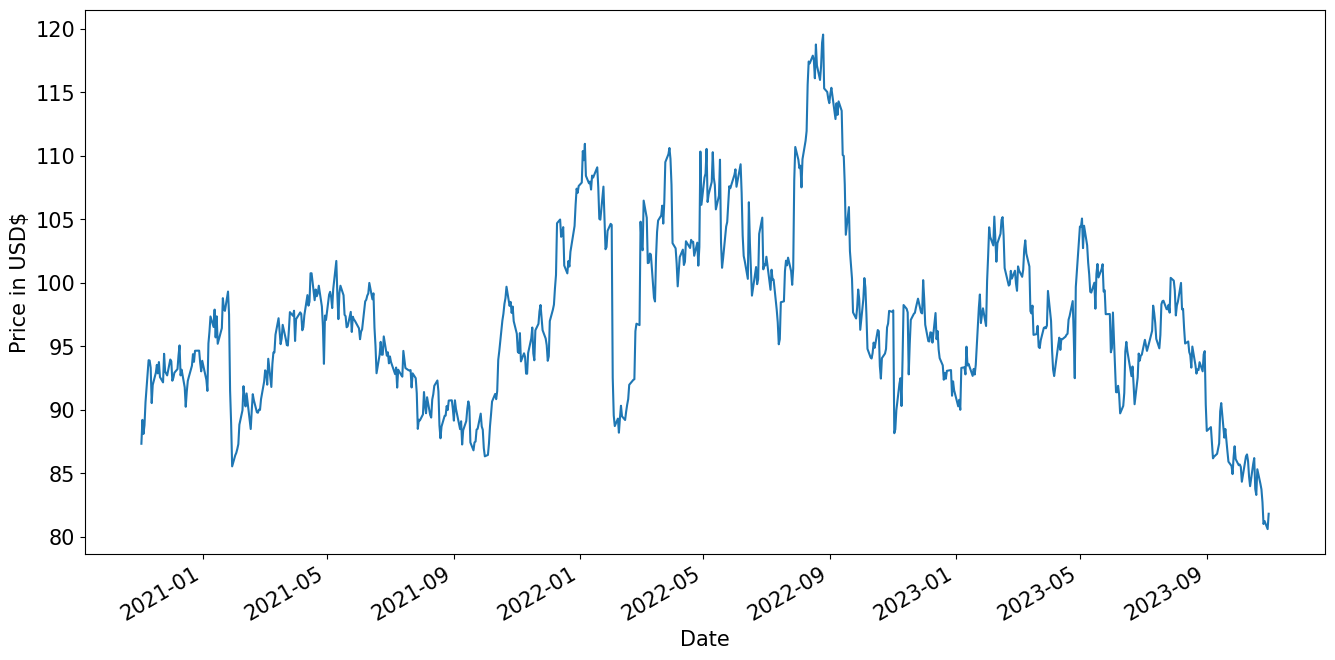

In [5]:
Stock['Close'].plot(figsize=(16, 8), ylabel='Price in USD$')

We need only Closing Price

In [6]:
Stock_pr = np.array(Stock.reset_index()['Close'])

In [7]:
Stock_pr_diff = Stock_pr[1:] - Stock_pr[:-1]
Stock_pr_log = np.log(Stock_pr)
Stock_pr_log_diff = Stock_pr_log[1:] - Stock_pr_log[:-1]

STATIONARITY

In [8]:
result = adfuller(Stock_pr)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

result = adfuller(Stock_pr_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

result = adfuller(Stock_pr_log)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

result = adfuller(Stock_pr_log_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.017022
p-value: 0.033335
	1%: -3.439
	5%: -2.865
	10%: -2.569
ADF Statistic: -21.034387
p-value: 0.000000
	1%: -3.439
	5%: -2.865
	10%: -2.569
ADF Statistic: -2.979930
p-value: 0.036812
	1%: -3.439
	5%: -2.865
	10%: -2.569
ADF Statistic: -21.010212
p-value: 0.000000
	1%: -3.439
	5%: -2.865
	10%: -2.569


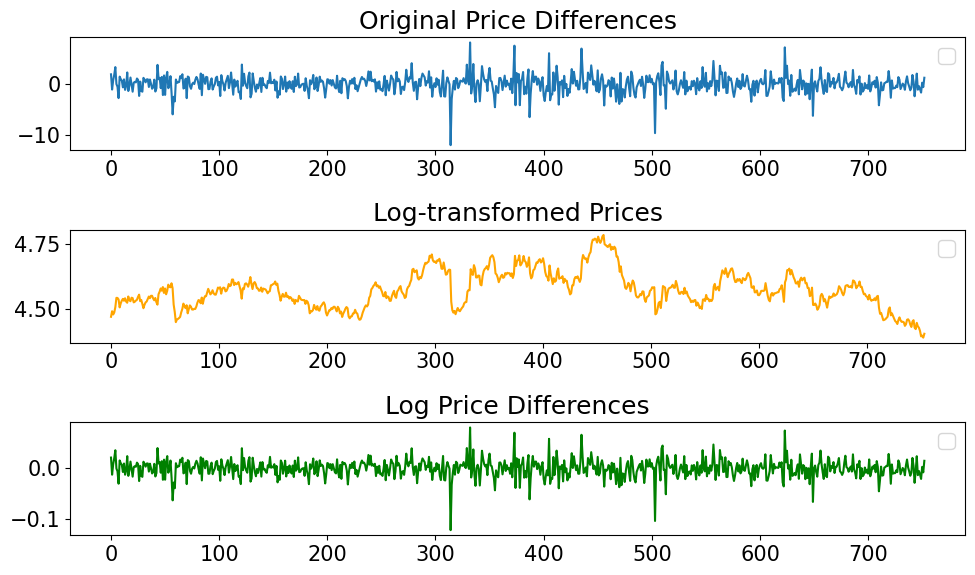

In [9]:
# Plotting all three series in one graph
plt.figure(figsize=(10, 6))

# Original price differences
plt.subplot(3, 1, 1)
plt.plot(Stock_pr_diff)
plt.title('Original Price Differences')
plt.legend()

# Log-transformed prices
plt.subplot(3, 1, 2)
plt.plot(Stock_pr_log, color='orange')
plt.title('Log-transformed Prices')
plt.legend()

# Log price differences
plt.subplot(3, 1, 3)
plt.plot(Stock_pr_log_diff, color='green')
plt.title('Log Price Differences')
plt.legend()

plt.tight_layout()
plt.show()

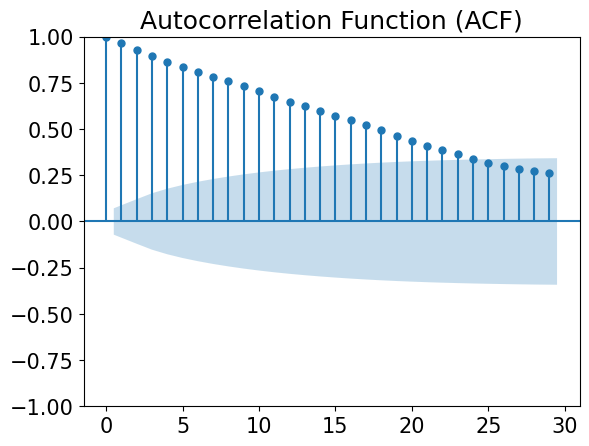

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(Stock_pr)
plt.title('Autocorrelation Function (ACF)')
plt.show()

In [11]:
from math import ceil

In [12]:
df = pd.DataFrame(Stock_pr_diff)
# Splitting the data into training (80%) and testing (20%)
train_size = ceil(len(df) * 0.80)  # 80% for training
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

In [13]:
# Finding the optimal p, d, and q values
best_aic = float("inf")
best_bic = float("inf")
best_order = None

for p in range(6):  # Range for p values
    for d in range(1):  # Range for d values
        for q in range(3):  # Range for q values
            try:
                model = ARIMA(train_data, order=(p, d, q))
                results = model.fit()

                aic = results.aic
                bic = results.bic

                print(f"AIC: {aic}, BIC: {bic}, Order: ({p}, {d}, {q})")

                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
                if bic < best_bic:
                    best_bic = bic
            except:
                continue

print(f"Best AIC: {best_aic}, Best BIC: {best_bic}")

AIC: 2396.9878159410546, BIC: 2405.791650334509, Order: (0, 0, 0)
AIC: 2398.753636256837, BIC: 2411.9593878470187, Order: (0, 0, 1)
AIC: 2396.538082990531, BIC: 2414.1457517774397, Order: (0, 0, 2)
AIC: 2398.792902143722, BIC: 2411.9986537339037, Order: (1, 0, 0)
AIC: 2399.4842197815597, BIC: 2417.091888568468, Order: (1, 0, 1)
AIC: 2398.423944916007, BIC: 2420.433530899643, Order: (1, 0, 2)
AIC: 2396.5146154018526, BIC: 2414.122284188761, Order: (2, 0, 0)
AIC: 2398.5086755410584, BIC: 2420.5182615246945, Order: (2, 0, 1)
AIC: 2400.3896004368535, BIC: 2426.8011036172165, Order: (2, 0, 2)
AIC: 2398.5095466019307, BIC: 2420.5191325855667, Order: (3, 0, 0)
AIC: 2400.5097260558728, BIC: 2426.921229236236, Order: (3, 0, 1)
AIC: 2397.0921345961638, BIC: 2427.905554973254, Order: (3, 0, 2)
AIC: 2400.4918298515254, BIC: 2426.9033330318885, Order: (4, 0, 0)
AIC: 2402.1703217700556, BIC: 2432.9837421471457, Order: (4, 0, 1)
AIC: 2396.5879874760344, BIC: 2431.803325049852, Order: (4, 0, 2)
AIC: 2

In [14]:
model = ARIMA(train_data, order=(5,0,2))
ARIMA_res = model.fit()
print(ARIMA_res.summary());

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  603
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -1188.352
Date:                Fri, 15 Dec 2023   AIC                           2394.705
Time:                        22:44:31   BIC                           2434.322
Sample:                             0   HQIC                          2410.123
                                - 603                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0154      0.070      0.220      0.826      -0.122       0.152
ar.L1         -0.5984      0.040    -15.024      0.000      -0.677      -0.520
ar.L2         -1.0438      0.050    -20.865      0.0

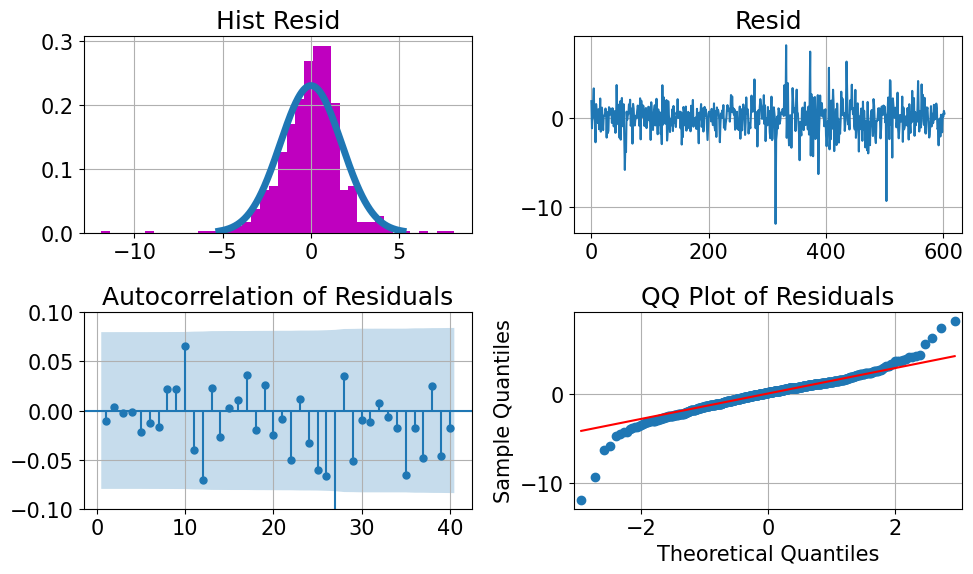

In [15]:

data = ARIMA_res.resid

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))

# Histogram of data
ax1.hist(data, bins=40, color='m', density=True)
mu = data.mean()
sigma = data.std()
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 2419)
ax1.plot(x, stats.norm.pdf(x, mu, sigma), linewidth=5)
ax1.grid()
ax1.set_title("Hist Resid")

# Plotting data
ax2.plot(data)
ax2.grid()
ax2.set_title("Resid")

# Autocorrelation plot
tsaplots.plot_acf(data, lags=40, zero=False, ax=ax3, use_vlines=True)
ax3.set_ylim(-0.1, 0.1)
ax3.grid()
ax3.set_title("Autocorrelation of Residuals")

# QQ plot
sm.qqplot(data, line='q', ax=ax4)
ax4.grid()
ax4.set_title("QQ Plot of Residuals")

plt.tight_layout()
plt.show()

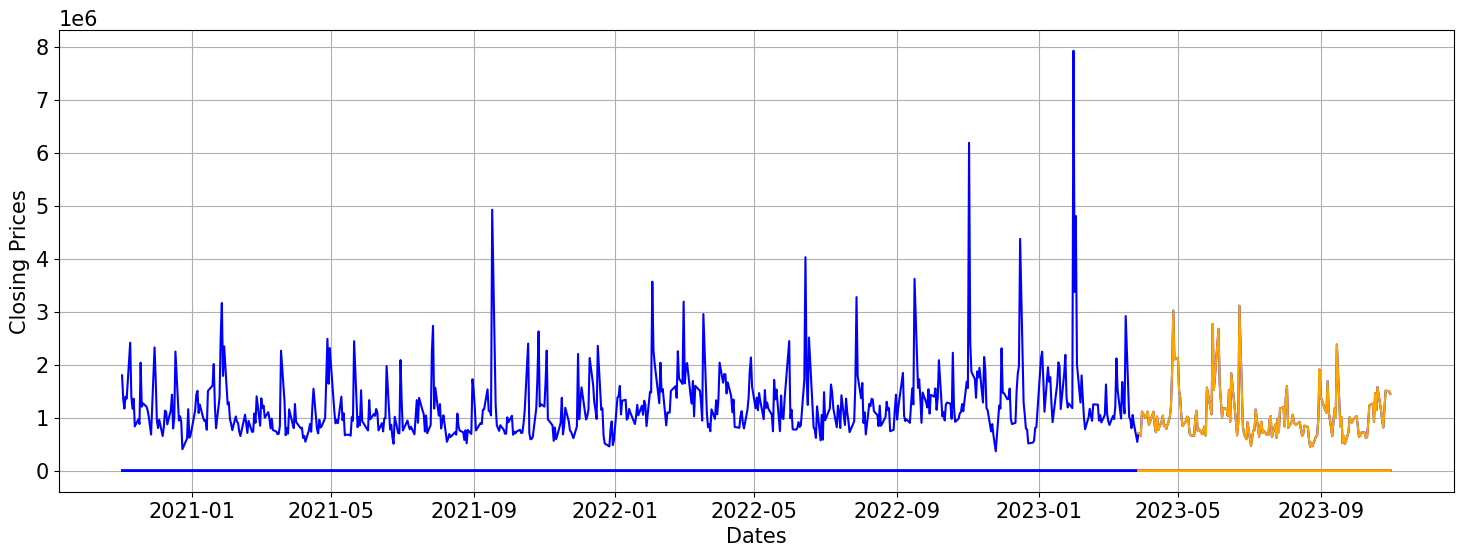

In [16]:
#split data into train and training set
train_data, test_data = Stock[0:int(len(Stock)*0.80)], Stock[int(len(Stock)*0.80):]
training_data = train_data['Close'].values
testing_data = test_data['Close'].values
plt.figure(figsize=(18,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(Stock, 'blue', label='Train data')
plt.plot(test_data, 'orange', label='Test data')
#plt.legend()

In [17]:
from sklearn.metrics import mean_squared_error
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(testing_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(5,0,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = testing_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(testing_data, model_predictions)
RMSE_error = math.sqrt(mean_squared_error(testing_data, model_predictions))
print('Testing MSE : {}'.format(MSE_error))
print('Testing RMSE : {}'.format(RMSE_error))

Testing MSE : 2.4687368489029087
Testing RMSE : 1.5712214512610592


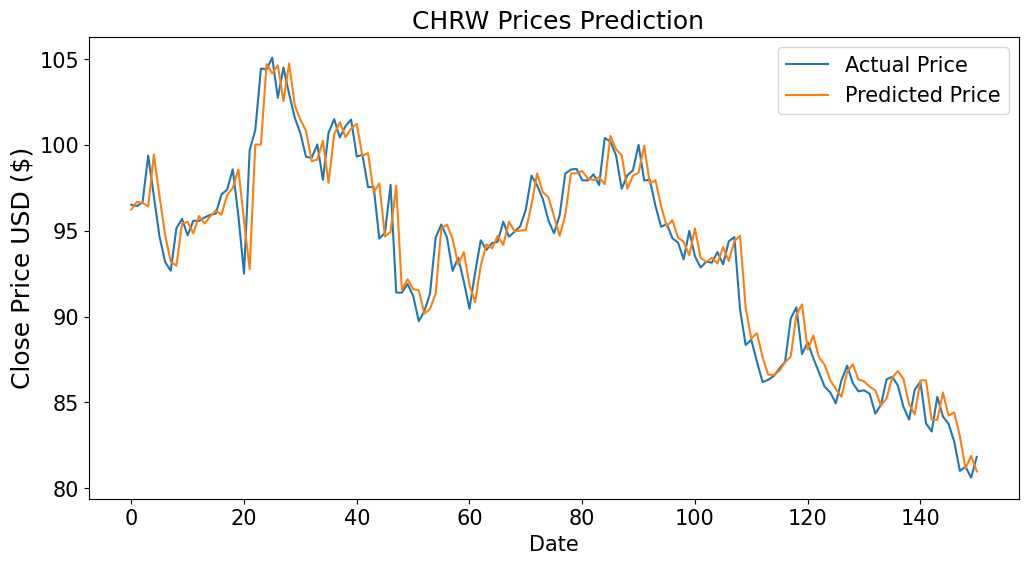

In [18]:
test_set_range = Stock[int(len(Stock)*0.80):].index
plt.figure(figsize=(12,6))
plt.plot(testing_data, label='Actual Price')
plt.plot(pd.DataFrame(model_predictions),label='Predicted Price')
#plt.plot(test_data, color='red', label='Actual Price')
plt.title(' CHRW Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()